# Lab 09 - M-ary Amplitude and Frequency Shift Keying, Signal Space

### Maurice Woods

### 25 April 2017


------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
## EC 01 - Amplitude Shift Keying

In [ ]:
from pylab import *
import ecen4652 as ecen
import quick
import keyfun
import ascfun
import pamfun
import ptfun
import showfun
import wavfun
import filtfun

##### Part A)

Start a new Python module called keyfun.py and use your pam12 function from the pamfun module as a building block to complete the ASK transmitter function $askxmtr$

In [ ]:
FB = 100
Fs = 44100
fc = 300

string = "M"
dn = ascfun.asc2bin(string,8)
seq_an = ecen.sigSequ(dn,FB)
print('"',string,'" Unipolar ASCII sequence: ', seq_an.sig, '\n')

thetacn = rand()
thetac = -pi/2.0

[xt_unicoh,st_unicoh]=keyfun.askxmtr(seq_an,Fs,'rect',[],'coh',[fc,thetac],['nopulse'])
tt=quick.quicktt(st_unicoh.signal(),Fs)
quick.quickplot(tt,xt_unicoh.signal(),'r',[],[],'','OOK Signal x(t), FB='+str(FB)+'Hz, $f_c$='+str(fc)+'Hz, $\\theta_c$='+str(thetac*180/pi)+'$^o$','x(t)','t [sec]')

seq_an.sig = (seq_an.signal()*2)-1

[xt_bicoh,st_bicoh]=keyfun.askxmtr(seq_an,Fs,'rect',[],'coh',[fc,thetac],['noplot'])
#tt=quick.quicktt(st_bicoh.signal(),Fs)
quick.quickplot(tt,xt_bicoh.signal(),'r',[],[],'','BPSK Signal x(t), FB='+str(FB)+'Hz, $f_c$='+str(fc)+'Hz, $\\theta_c$='+str(thetac*180/pi)+'$^o$','x(t)','t [sec]')

seq_an.sig = (seq_an.signal()+1)/2.0

[xt_uninoncoh,st_uninoncoh]=keyfun.askxmtr([seq_an,'rand'],Fs,'rect',[],'noncoh',[fc],['noplot'])
#tt=quick.quicktt(st_uninoncoh.signal(),Fs)
quick.quickplot(tt,xt_uninoncoh.signal(),'r',[],[],'','OOK Signal x(t), FB='+str(FB)+'Hz, $f_c$='+str(fc)+'Hz, Random $\\theta_c[n]$','x(t)','t [sec]')

##### Part B)

In the keyfun.py module, complete the following ASK receiver function, called $askrcvr$. Use it to receive coherent and noncoherent ASK signals, and to make scatter plots.

Use the $pamrcvr10$ function in module $pamfun$ as part of the ASK receiver. Test $askrcvr$ together with askxmtr using random (unipolar) binary data and the parameters given in part (a).

In [ ]:
ptype = 'rect'
[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(xt_unicoh,'coh',[fc,thetac],[FB,0.5],ptype,[1,1])
tt=quick.quicktt(sig_bt.signal(),Fs)
quick.quickplot(tt,sig_bt.signal(),'-b',tt[ixn],seq_bn.signal(),'or')

[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(xt_bicoh,'coh',[fc,thetac],[FB,0.5],ptype,[1,1])
tt=quick.quicktt(sig_bt.signal(),Fs)
quick.quickplot(tt,sig_bt.signal(),'-b',tt[ixn],seq_bn.signal(),'or')

[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(xt_uninoncoh,'noncoh',fc,[FB,0.5],ptype,[1,1])
tt=quick.quicktt(sig_bt.signal(),Fs)
quick.quickplot(tt,sig_bt.signal(),'-b',tt[ixn],seq_bn.signal(),'or')

##### Part C)

Let $F_s = 44100$Hz, $F_B = 100$baud, $f_c = 2100$Hz, and let $p(t)$ be a rectangular pulse of width $T_B$ . Use random binary data to produce (i) a coherent OOK signal, (ii) a noncoherent OOK signal, and (iii) a BPSK signal, each of duration 2 sec. Plot and compare the PSDs for
all three cases. Then use the $wt$ and $wn=wt[ixn]$ outputs of the askrcvr function to make scatter plots for the three signals and compare them. 

In [ ]:
Fs = 44100 # [Hz]
FB = 100 # [baud]
fc = 2100 # [Hz]
t = 2 # [sec]
ptype = 'rect'
pparms = []

pt = ptfun.pampt(Fs/FB, ptype)






[sig_pt,seq_an] = pamfun.randompam(t,ptype,pparms,FB,Fs,'uni')
[xt_unicoh,st_unicoh]=keyfun.askxmtr(seq_an,Fs,ptype,pparms,'coh',[fc,thetac],['noplot'])
[psd_unicoh,ff] = showfun.showpsd(xt_unicoh,[-fc-1000,fc+1000,-60],Fs,'noplot')

#tt=quick.quicktt(st_unicoh.signal(),Fs)
#quick.quickplot(tt,xt_unicoh.signal(),'r',[],[],'','OOK Signal x(t), FB='+str(FB)+'Hz, $f_c$='+str(fc)+'Hz, $\\theta_c$='+str(thetac*180/pi)+'$^o$','x(t)','t [sec]')

seq_an.sig = (seq_an.signal()*2)-1
[xt_bicoh,st_bicoh]=keyfun.askxmtr(seq_an,Fs,ptype,pparms,'coh',[fc,thetac],['noplot'])
[psd_bicoh,ff] = showfun.showpsd(xt_bicoh,[-fc-1000,fc+1000,-60],Fs,'noplot')
#tt=quick.quicktt(st_bicoh.signal(),Fs)
#quick.quickplot(tt,xt_bicoh.signal(),'r',[],[],'','BPSK Signal x(t), FB='+str(FB)+'Hz, $f_c$='+str(fc)+'Hz, $\\theta_c$='+str(thetac*180/pi)+'$^o$','x(t)','t [sec]')

seq_an.sig = (seq_an.signal()+1)/2.0
[xt_uninoncoh,st_uninoncoh]=keyfun.askxmtr([seq_an,'rand'],Fs,ptype,pparms,'noncoh',[fc],['noplot'])
[psd_uninoncoh,ff] = showfun.showpsd(xt_uninoncoh,[-fc-1000,fc+1000,-60],Fs,'noplot')
#tt=quick.quicktt(st_uninoncoh.signal(),Fs)
#quick.quickplot(tt,xt_uninoncoh.signal(),'r',[],[],'','OOK Signal x(t), FB='+str(FB)+'Hz, $f_c$='+str(fc)+'Hz, Random $\\theta_c[n]$','x(t)','t [sec]')

#quick.quickplot(ff,psd_unicoh,'-b',ff,psd_bicoh,'-r')
plt.figure(figsize=(14,4))
plt.plot(ff,psd_unicoh,'-b',label="Coh OOK")
plt.plot(ff,psd_bicoh,'-r',label="Coh BPSK")
plt.plot(ff,psd_uninoncoh,'-g',label="Non-Coh OOK")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('f [Hz]')
plt.ylabel('Sx(f)')
grid()
plt.title('Comparison of PSDs for Various Rectangular ASK Transmitted Signals')
show()






[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(xt_unicoh,'coh',[fc,thetac],[FB,0.5],ptype,[1,1])
showfun.showaskscatter(sig_wt,ixn)

[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(xt_bicoh,'coh',[fc,thetac],[FB,0.5],ptype,[1,1])
showfun.showaskscatter(sig_wt,ixn)

[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(xt_uninoncoh,'noncoh',fc,[FB,0.5],ptype,[1,1])
showfun.showaskscatter(sig_wt,ixn)

Are there any interesting spectral lines if you look at the PSDs of the squared ASK signals? How do things change if you use a triangular pulse $p(t)$ (of total width $2T_B$ from $−T_B$ to $+T_B$ ) instead of the rectangular pulse?

In [ ]:
xt_unicoh_sqrd = xt_unicoh.copy()
xt_bicoh_sqrd = xt_bicoh.copy()
xt_uninoncoh_sqrd = xt_uninoncoh.copy()

xt_unicoh_sqrd.sig = xt_unicoh.signal()**2
xt_bicoh_sqrd.sig = xt_bicoh.signal()**2
xt_uninoncoh_sqrd.sig = xt_uninoncoh.signal()**2

[psd_unicoh,ff] = showfun.showpsd(xt_unicoh_sqrd,[-fc-1000,fc+1000,-60],Fs,'noplot')
[psd_bicoh,ff] = showfun.showpsd(xt_bicoh_sqrd,[-fc-1000,fc+1000,-60],Fs,'noplot')
[psd_uninoncoh,ff] = showfun.showpsd(xt_uninoncoh_sqrd,[-fc-1000,fc+1000,-60],Fs,'noplot')

plt.figure(figsize=(14,4))
plt.plot(ff,psd_unicoh,'-b',label="Coh OOK")
plt.plot(ff,psd_uninoncoh,'-g',label="Non-Coh OOK")
plt.plot(ff,psd_bicoh,'-r',label="Coh BPSK")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('f [Hz]')
plt.ylabel('Sx(f)^2')
grid()
plt.title('Comparison of PSDs for Various Squared Rectangular ASK Transmitted Signals')
show()

In [ ]:
ptype = 'tri'

pt = ptfun.pampt(Fs/FB, ptype)






[sig_pt,seq_an] = pamfun.randompam(t,ptype,pparms,FB,Fs,'uni')
[xt_unicoh,st_unicoh]=keyfun.askxmtr(seq_an,Fs,ptype,pparms,'coh',[fc,thetac],['noplot'])
[psd_unicoh,ff] = showfun.showpsd(xt_unicoh,[-fc-1000,fc+1000,-60],Fs,'noplot')

#tt=quick.quicktt(st_unicoh.signal(),Fs)
#quick.quickplot(tt,xt_unicoh.signal(),'r',[],[],'','OOK Signal x(t), FB='+str(FB)+'Hz, $f_c$='+str(fc)+'Hz, $\\theta_c$='+str(thetac*180/pi)+'$^o$','x(t)','t [sec]')

seq_an.sig = (seq_an.signal()*2)-1
[xt_bicoh,st_bicoh]=keyfun.askxmtr(seq_an,Fs,ptype,pparms,'coh',[fc,thetac],['noplot'])
[psd_bicoh,ff] = showfun.showpsd(xt_bicoh,[-fc-1000,fc+1000,-60],Fs,'noplot')
#tt=quick.quicktt(st_bicoh.signal(),Fs)
#quick.quickplot(tt,xt_bicoh.signal(),'r',[],[],'','BPSK Signal x(t), FB='+str(FB)+'Hz, $f_c$='+str(fc)+'Hz, $\\theta_c$='+str(thetac*180/pi)+'$^o$','x(t)','t [sec]')

seq_an.sig = (seq_an.signal()+1)/2.0
[xt_uninoncoh,st_uninoncoh]=keyfun.askxmtr([seq_an,'rand'],Fs,ptype,pparms,'noncoh',[fc],['noplot'])
[psd_uninoncoh,ff] = showfun.showpsd(xt_uninoncoh,[-fc-1000,fc+1000,-60],Fs,'noplot')
#tt=quick.quicktt(st_uninoncoh.signal(),Fs)
#quick.quickplot(tt,xt_uninoncoh.signal(),'r',[],[],'','OOK Signal x(t), FB='+str(FB)+'Hz, $f_c$='+str(fc)+'Hz, Random $\\theta_c[n]$','x(t)','t [sec]')

#quick.quickplot(ff,psd_unicoh,'-b',ff,psd_bicoh,'-r')
plt.figure(figsize=(14,4))
plt.plot(ff,psd_unicoh,'-b',label="Coh OOK")
plt.plot(ff,psd_bicoh,'-r',label="Coh BPSK")
plt.plot(ff,psd_uninoncoh,'-g',label="Non-Coh OOK")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('f [Hz]')
plt.ylabel('Sx(f)')
grid()
plt.title('Comparison of PSDs for Various Triangular ASK Transmitted Signals')
show()






xt_unicoh_sqrd = xt_unicoh.copy()
xt_bicoh_sqrd = xt_bicoh.copy()
xt_uninoncoh_sqrd = xt_uninoncoh.copy()

xt_unicoh_sqrd.sig = xt_unicoh.signal()**2
xt_bicoh_sqrd.sig = xt_bicoh.signal()**2
xt_uninoncoh_sqrd.sig = xt_uninoncoh.signal()**2

[psd_unicoh,ff] = showfun.showpsd(xt_unicoh_sqrd,[-fc-1000,fc+1000,-60],Fs,'noplot')
[psd_bicoh,ff] = showfun.showpsd(xt_bicoh_sqrd,[-fc-1000,fc+1000,-60],Fs,'noplot')
[psd_uninoncoh,ff] = showfun.showpsd(xt_uninoncoh_sqrd,[-fc-1000,fc+1000,-60],Fs,'noplot')

plt.figure(figsize=(14,4))
plt.plot(ff,psd_unicoh,'-b',label="Coh OOK")
plt.plot(ff,psd_bicoh,'-r',label="Coh BPSK")
plt.plot(ff,psd_uninoncoh,'-g',label="Non-Coh OOK")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('f [Hz]')
plt.ylabel('Sx(f)^2')
grid()
plt.title('Comparison of PSDs for Various Squared Triangular ASK Transmitted Signals')
show()






[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(xt_unicoh,'coh',[fc,thetac],[FB,0.5],ptype,[1,1])
showfun.showaskscatter(sig_wt,ixn)

[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(xt_bicoh,'coh',[fc,thetac],[FB,0.5],ptype,[1,1])
showfun.showaskscatter(sig_wt,ixn)

[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(xt_uninoncoh,'noncoh',fc,[FB,0.5],ptype,[1,1])
showfun.showaskscatter(sig_wt,ixn)

##### Part D)

The wav files asksig901.wav, asksig902.wav and asksig903.wav are binary ASK signals which contain 8-bit, LSB-first, ASCII signals. Analyze the three signals and extract the text messages.

In [ ]:
[asksig901,framerate901] = wavfun.wavread('asksig901.wav')

tt901 = quick.quicktt(asksig901,framerate901)

quick.quickplot(tt901,asksig901,'',[],[],'','"ask901.wav"','Time [s]','r(t)',['first',1000])
print('This appears to be a noncoherent BPSK signal')

sig_asksig901 = ecen.sigWave(asksig901,framerate901)

showfun.showpsd(sig_asksig901,[-10000,10000,-60],framerate901,'','zoom')

fc=4500
FB=300
thetac=0
dly=0.5
ptype = 'rect'

[sig_asksig901, order] = filtfun.trapfilt(sig_asksig901, [FB, fc], 20, .05)
showfun.showpsd(sig_asksig901,[-10000,10000,-60],framerate901,'')

[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(sig_asksig901,'noncoh',fc,[FB,dly],ptype,[])
tt=quick.quicktt(sig_bt.signal(),Fs)
quick.quickplot(tt,sig_bt.signal(),'-b',tt[ixn],seq_bn.signal(),'or')

[text901,ascii901]=ascfun.bin2asc(seq_bn.signal(), 8, 0.05)
print(text901)

In [ ]:
[asksig902,framerate902] = wavfun.wavread('asksig902.wav')

tt902 = quick.quicktt(asksig902,framerate902)

quick.quickplot(tt902,asksig902,'',[],[],'','"ask902.wav"','Time [s]','r(t)',['first',1000])
print('This appears to be an OOK signal')

sig_asksig902 = ecen.sigWave(asksig902,framerate902)
showfun.showpsd(sig_asksig902,[-10000,10000,-60],framerate902)

fc = 6250
FB = 1800

[sig_asksig902, order] = filtfun.trapfilt(sig_asksig902, [FB, fc], 20, .05)
showfun.showpsd(sig_asksig902,[-10000,10000,-60],framerate902)

thetac=-pi/2.0
ptype='rect'
dly = 0.5

[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(sig_asksig902,'coh',[fc,thetac],[FB,0.5],ptype,[1,1])
tt=quick.quicktt(sig_bt.signal(),Fs)
quick.quickplot(tt,sig_bt.signal(),'-b',tt[ixn],seq_bn.signal(),'or')

[text902,ascii902]=ascfun.bin2asc(seq_bn.signal(), 8, 0.05)
print(text902)

In [ ]:
[asksig903,framerate903] = wavfun.wavread('asksig903.wav')

tt903 = quick.quicktt(asksig903,framerate903)

quick.quickplot(tt903,asksig903,'',[],[],'','"ask903.wav"','Time [s]','r(t)',['first',1000])
print('This appears to be a coherent BPSK signal')

sig_asksig903 = ecen.sigWave(asksig903,framerate903)
showfun.showpsd(sig_asksig903,[-10000,10000,-60],framerate903)

[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(xt_unicoh,'coh',[fc,thetac],[FB,0.5],ptype,[1,1])
tt=quick.quicktt(sig_bt.signal(),Fs)
quick.quickplot(tt,sig_bt.signal(),'-b',tt[ixn],seq_bn.signal(),'or')

## EC 02 - Frequency Shift Keying

In [2]:
from pylab import *
import ecen4652 as ecen
import quick
import keyfun
import showfun

##### Part A)
For the Python module keyfun.py, write a function
called fskxmtr which implements an M -ary FSK transmitter for either coherent, noncoherent, or continuous phase FSK.

Test fskxmtr by recreating the three (time domain) sample graphs for $F_B = 100 baud$, $f_c0 = 300 Hz$ and $f_c1 = 400 Hz$, which were given in the introduction for binary coherent FSK, noncoherent FSK, and CPFSK. Use $d_n = \{0, 1, 1, 1, 0, 0, 1, 0\}$ and (for the second graph) $θ_c [n] = \{270^◦ , 225^◦ , 4^◦ , 135^◦ , 250^◦ , 90^◦ , 40^◦ , 240^◦ \}$.

[0 1 1 1 0 0 1 0]


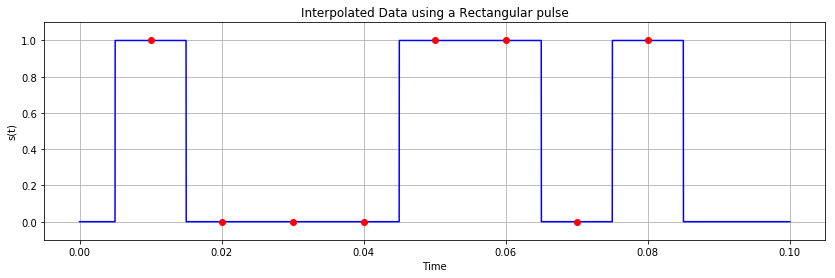

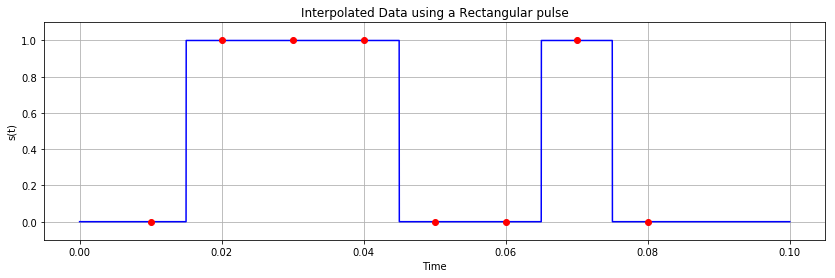

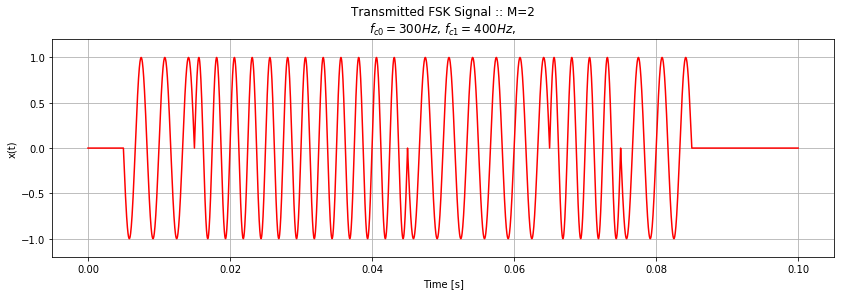

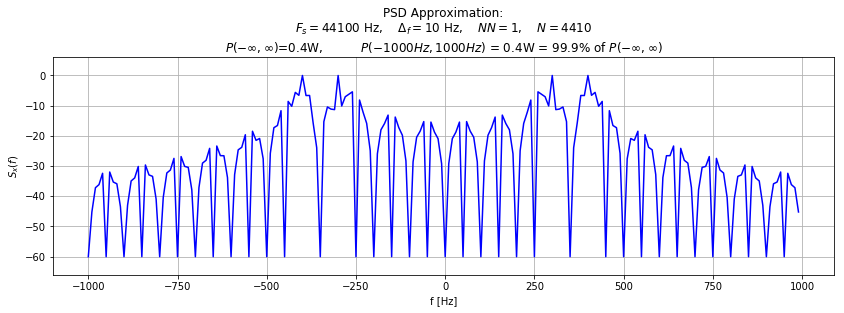

/home/maurice/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab09/keyfun.py:210: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if thetacn == '' or thetacn == 'rand':


[ 0.  1.  1.  1.  0.  0.  1.  0.]


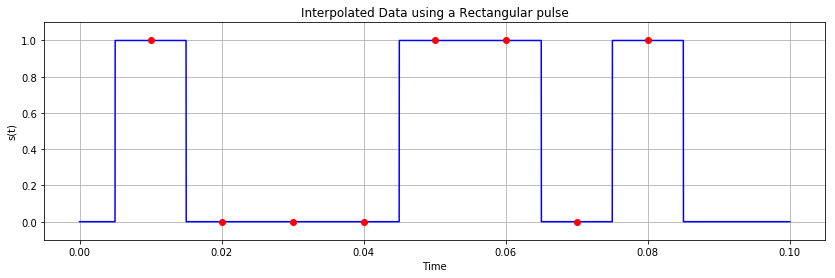

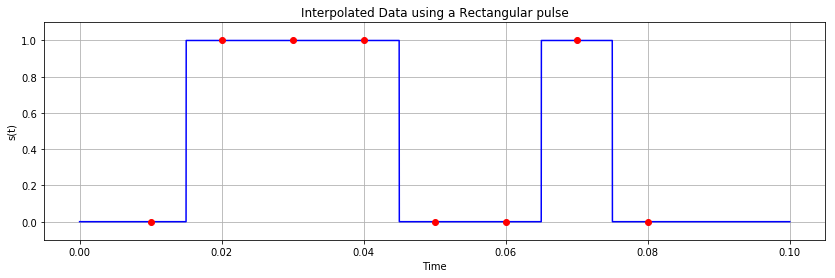

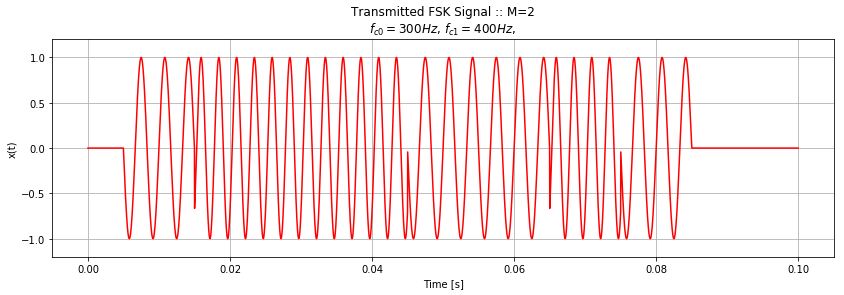

In [3]:
M = 2
Fs = 44100
FB = 100
fc0 = 300
fc1 = 400
thetac0 = -pi/2.0
thetac1 = -pi/2.0
dn = asarray([0,1,1,1,0,0,1,0])
thetacn = (asarray([-270,225,4,135,-250,-90,40,-240])*pi/180.0)
fcparms = [[fc0,fc1],[thetac0,thetac1]]
ptype = 'rect'
pparms = []

sig_xt_coh = keyfun.fskxmtr(M,ecen.sigSequ(dn,FB),Fs,ptype,pparms,'coh',[[fc0,fc1],[-thetac0,thetac1]])
showfun.showpsd(sig_xt_coh,[-1000,1000,-60],Fs)

sig_xt_noncoh = keyfun.fskxmtr(2,ecen.sigSequ([dn,thetacn],FB),Fs,ptype,pparms,'noncoh',[fc0,fc1])



##### Part B)
In the keyfun.py module, implement the FSK receiver function $fskrcvr$

Test all receiver modes with the signals that you generated in (a) when you were testing $fskxmtr$.

In [4]:
[sig_bn_coh,sig_wt_coh,ixn_coh]=keyfun.fskrcvr(M,sig_xt_coh,'coh',[[fc0,fc1],[thetac0,thetac1]],[FB,0.5],ptype,pparms)
[sig_bn_non,sig_wt_non,ixn_non]=keyfun.fskrcvr(M,sig_xt_noncoh,'noncoh',[fc0,fc1],[FB,0.5],ptype,pparms)

print(sig_bn_coh.signal())
print(sig_bn_non.signal())

NameError: name 'ixnn0' is not defined

##### Part C)
Generate a coherent binary FSK signal from random data with equally likely 0’s and 1’s, using a rectangular $p(t)$, $F_B = 100 baud$, $f_c0 = 300 Hz$, $θ_c0 = 0^◦$ , $f_c1 = 400 Hz$, and $θ_c1 = 0^◦$. Use a coherent demodulator to produce a scatter plot of $w_0 [n]$ versus $w_1 [n]$. Change the phase $θ_c1$ from $0^◦$ to $180^◦$ and check whether the signals transmitted at f c0 and at f c1 remain orthogonal in the signal space spanned by w 0 [n] and w 1 [n]. Is it possible to reduce the frequency spacing $\Delta_f = f_c1 − f_c0$ to a value less than $F_B$ while maintaining orthogonality? Try changing $f c1$ to 350 Hz and vary the phase $θ_c1$ again from $0^◦$ to $180^◦$ .

##### Part D)
Use uniformly distributed random M -ary data of length about 2 sec to generate PSD plots of M = 2 and M = 4 coherent, noncoherent, and continous-phase FSK (CPFSK) signals with rectangular p(t). Determine the -40dB bandwidth in all cases. Use $F_B = 100$ baud, $f_c0 = 2100 Hz$, and $f_{cm} = f_{c0} + mF_B$ . For coherent FSK set $\theta_{cm} = 0$ for all m. For CPFSK choose the phases $\theta_{cm}$ such that there are no phase jumps.

##### Part E)
The wav files fsksig901.wav and fsksig902.wav contain binary FSK signals made from 8-bit, LSB-first, ASCII encoded characters. Analyze the two signals and extract the text messages.

##### Part F)
The binary GNU Radio file digMod_905.bin contains several (complex-valued) binary communication signals. Use the GNU Radio Companion to find the signals recorded in the file and determine their properties such as the type of modulation and the carrier frequencies. Each of the signals contains an ASCII coded (MSB first) message. Try to demodulate the signals and extract the messages.